- Understand the problem
- Recognise the task
- Perform preprocessing, EDA, feature enginering
- Train the model(there is not a perfect fit...trial and error with all the models)
- EvaluationN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('CO2_Emissions_Canada.csv')
data.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


- the above data is about vehicles we should prepare a model that can predict the emissions of a vehicle

- Label/Target column is the CO2Emissions
- because the problem answer is required from this column therefore its called the label

- This is contineous neumerical 
- So task is a regression as the label is contineous neumerical

- now reguler task

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [4]:
data.duplicated().sum()

1103

In [5]:
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [7]:
data.nunique()

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

In [8]:
data['Fuel Type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [9]:
data['Cylinders'].unique()

array([ 4,  6, 12,  8, 10,  3,  5, 16], dtype=int64)

In [10]:
data['Vehicle Class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [11]:
data.Transmission.unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

### data preprocess completed
## Poceding for EDA
- In machine learning EDA(Exploratory data analysis) we do not do full pledged EDA, our goal is just to check how our target col is affecting by other features

<Axes: xlabel='Engine Size(L)', ylabel='CO2 Emissions(g/km)'>

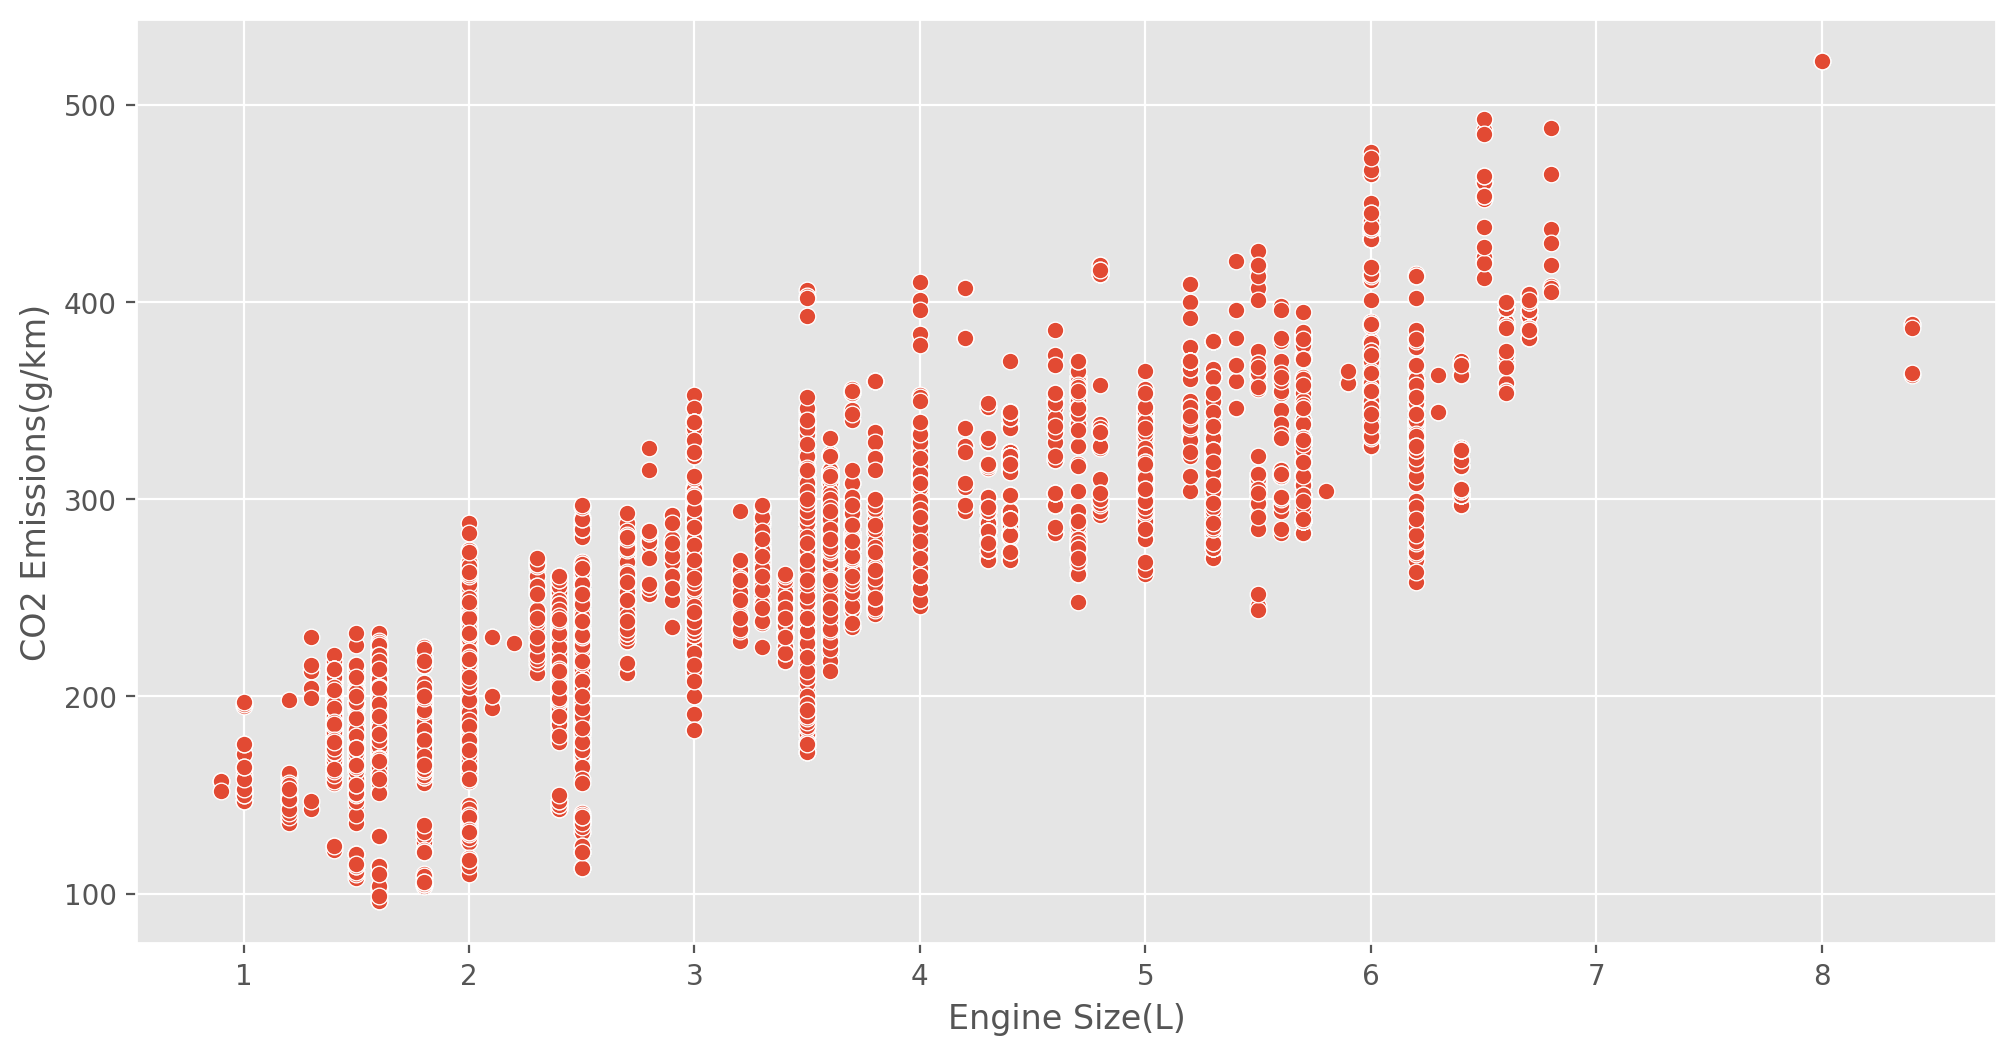

In [12]:
# Engine Size and Carbon Emission
plt.figure(figsize = (12,6), dpi = 200)
sns.scatterplot(x='Engine Size(L)', y='CO2 Emissions(g/km)', data = data)

<Axes: xlabel='Engine Size(L)', ylabel='CO2 Emissions(g/km)'>

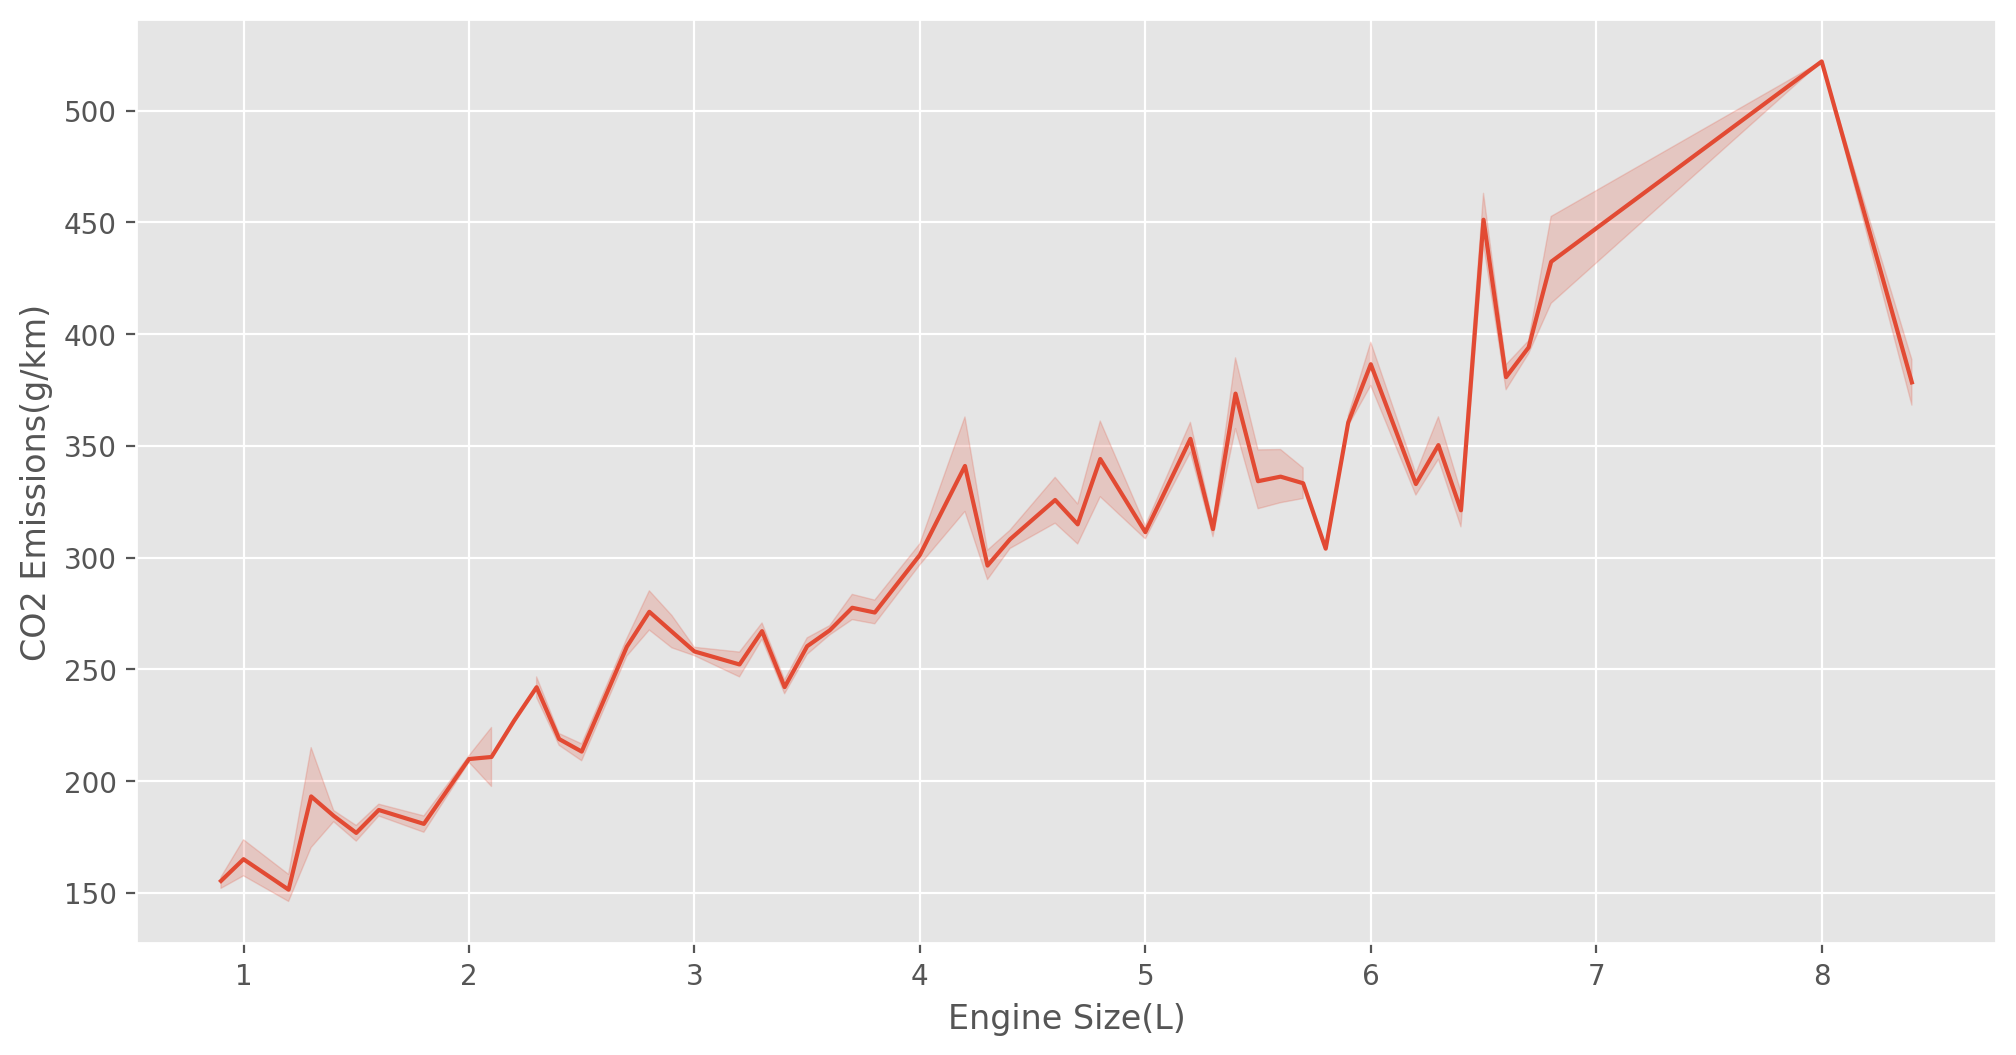

In [13]:
# Engine Size and Carbon Emission
plt.figure(figsize = (12,6), dpi = 200)
sns.lineplot(x='Engine Size(L)', y='CO2 Emissions(g/km)', data = data)

- noticing that as engine size increses CO2 emission increases

<Axes: xlabel='Fuel Consumption Comb (L/100 km)', ylabel='CO2 Emissions(g/km)'>

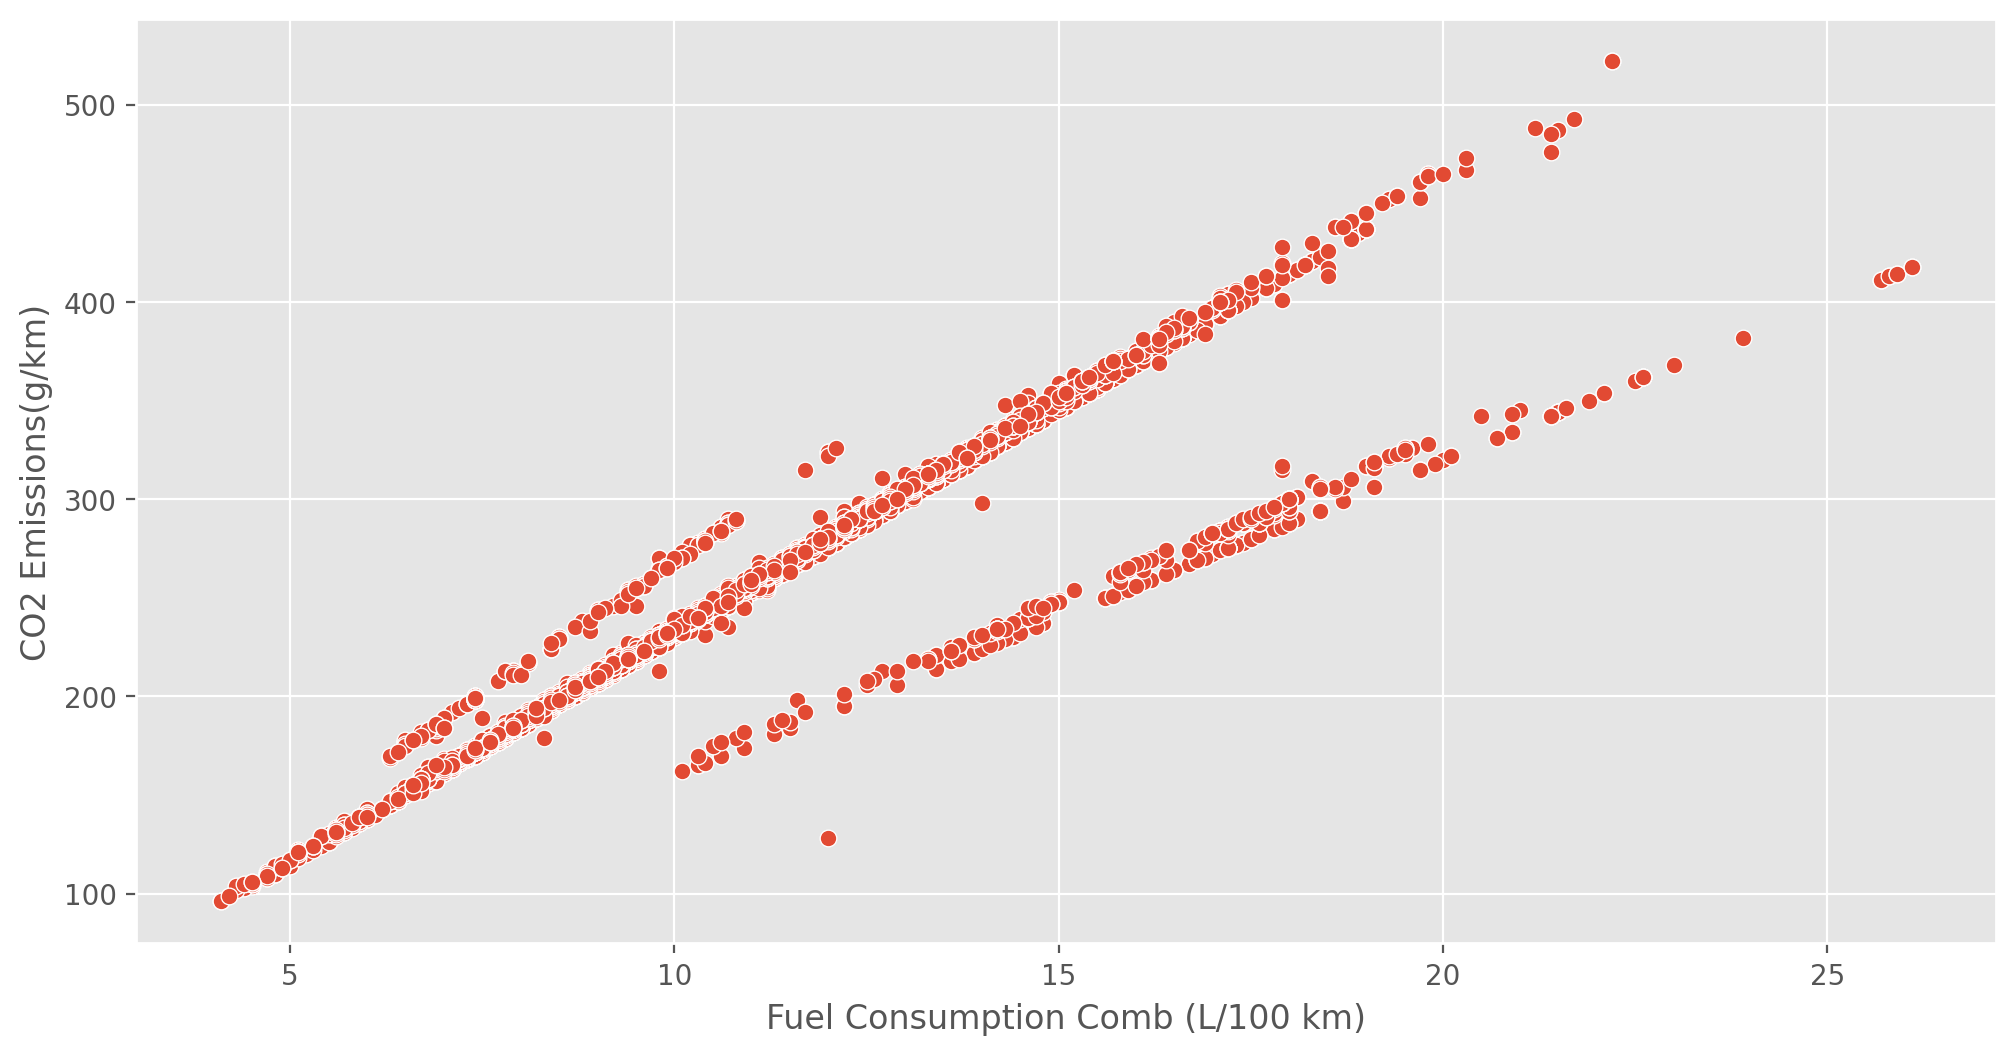

In [14]:
# Fuel Consumption and Carbon Emission
plt.figure(figsize = (12,6), dpi = 200)
sns.scatterplot(x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)', data = data)

- In the above scatterplot three diffrent types of fuel is used therefore 3 diffrent line, just to confirm it, use hue

<Axes: xlabel='Fuel Consumption Comb (L/100 km)', ylabel='CO2 Emissions(g/km)'>

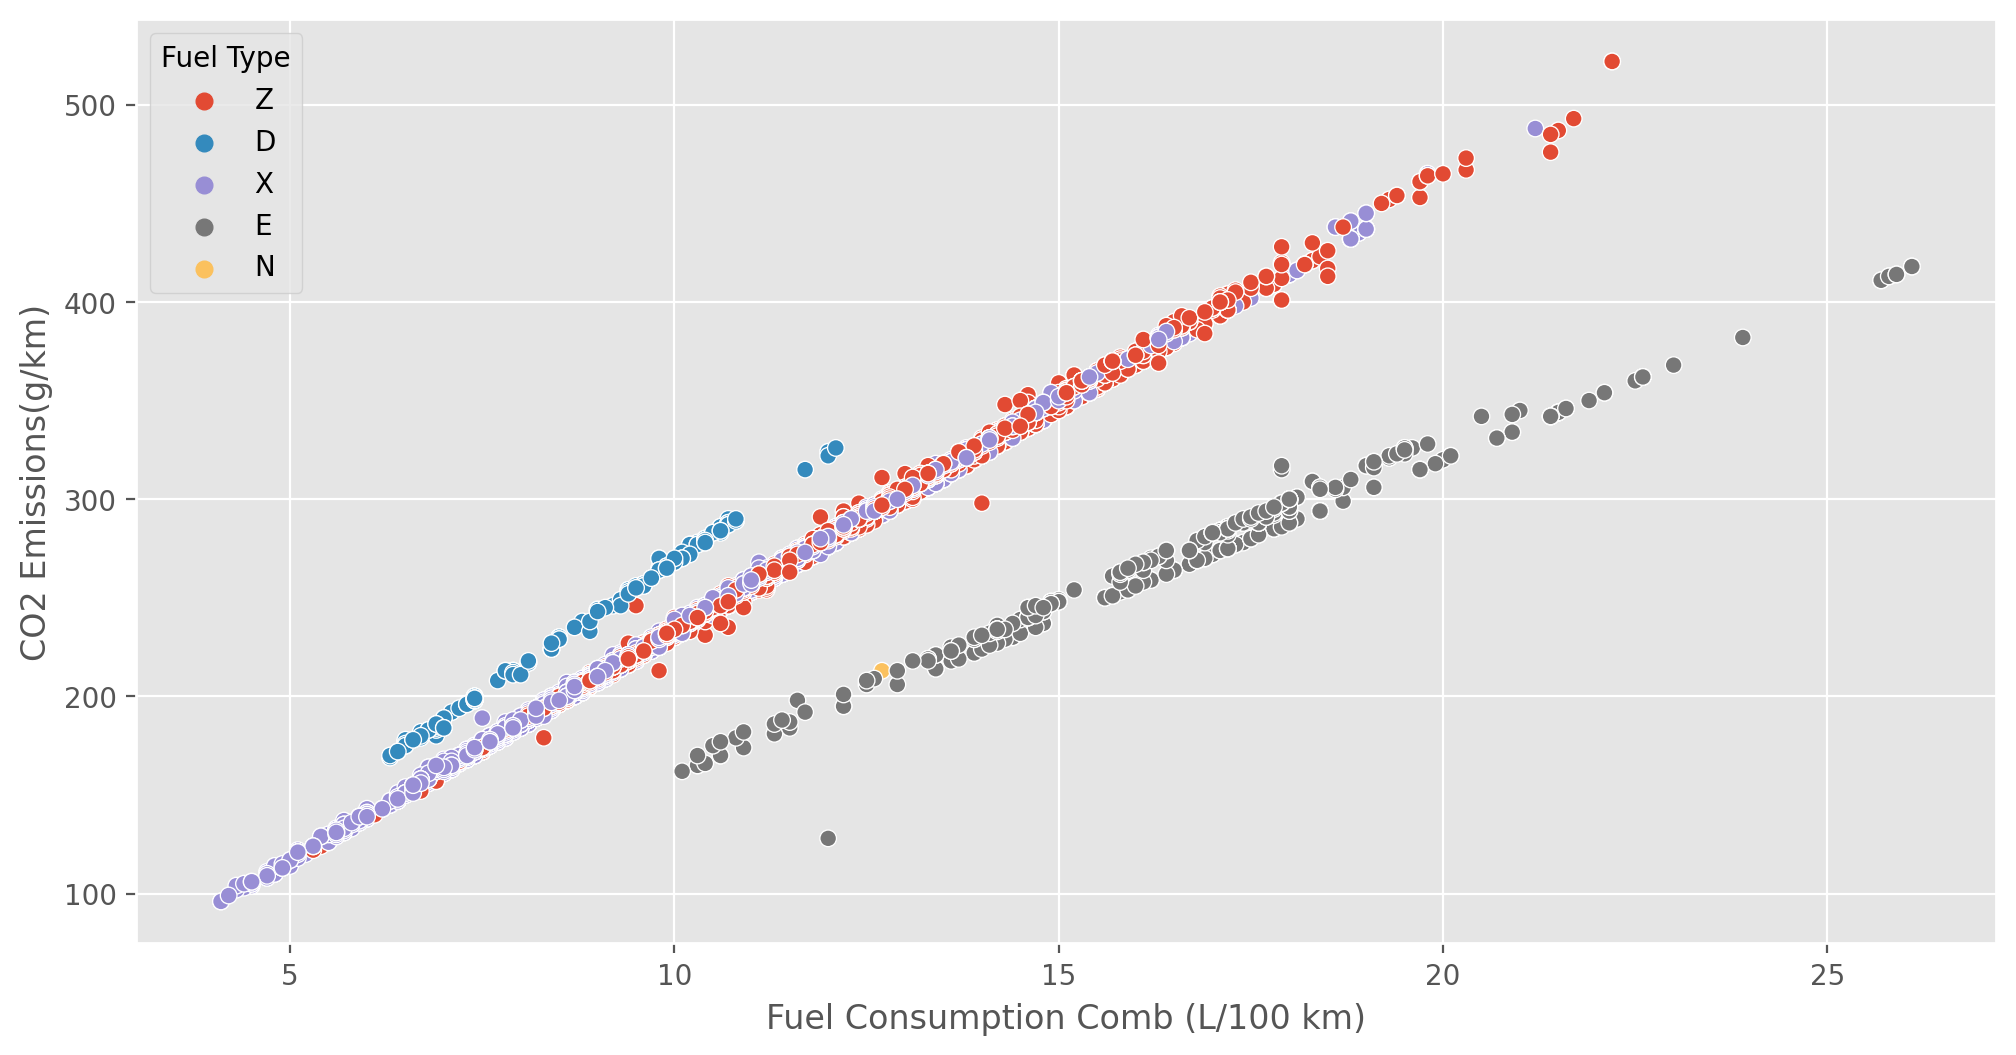

In [15]:
plt.figure(figsize = (12,6), dpi = 200)
sns.scatterplot(x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)', hue='Fuel Type', data = data)

- from above chrats we can analyse that as the fuel consumption increses the carbon emission also increases

<Axes: xlabel='Cylinders', ylabel='CO2 Emissions(g/km)'>

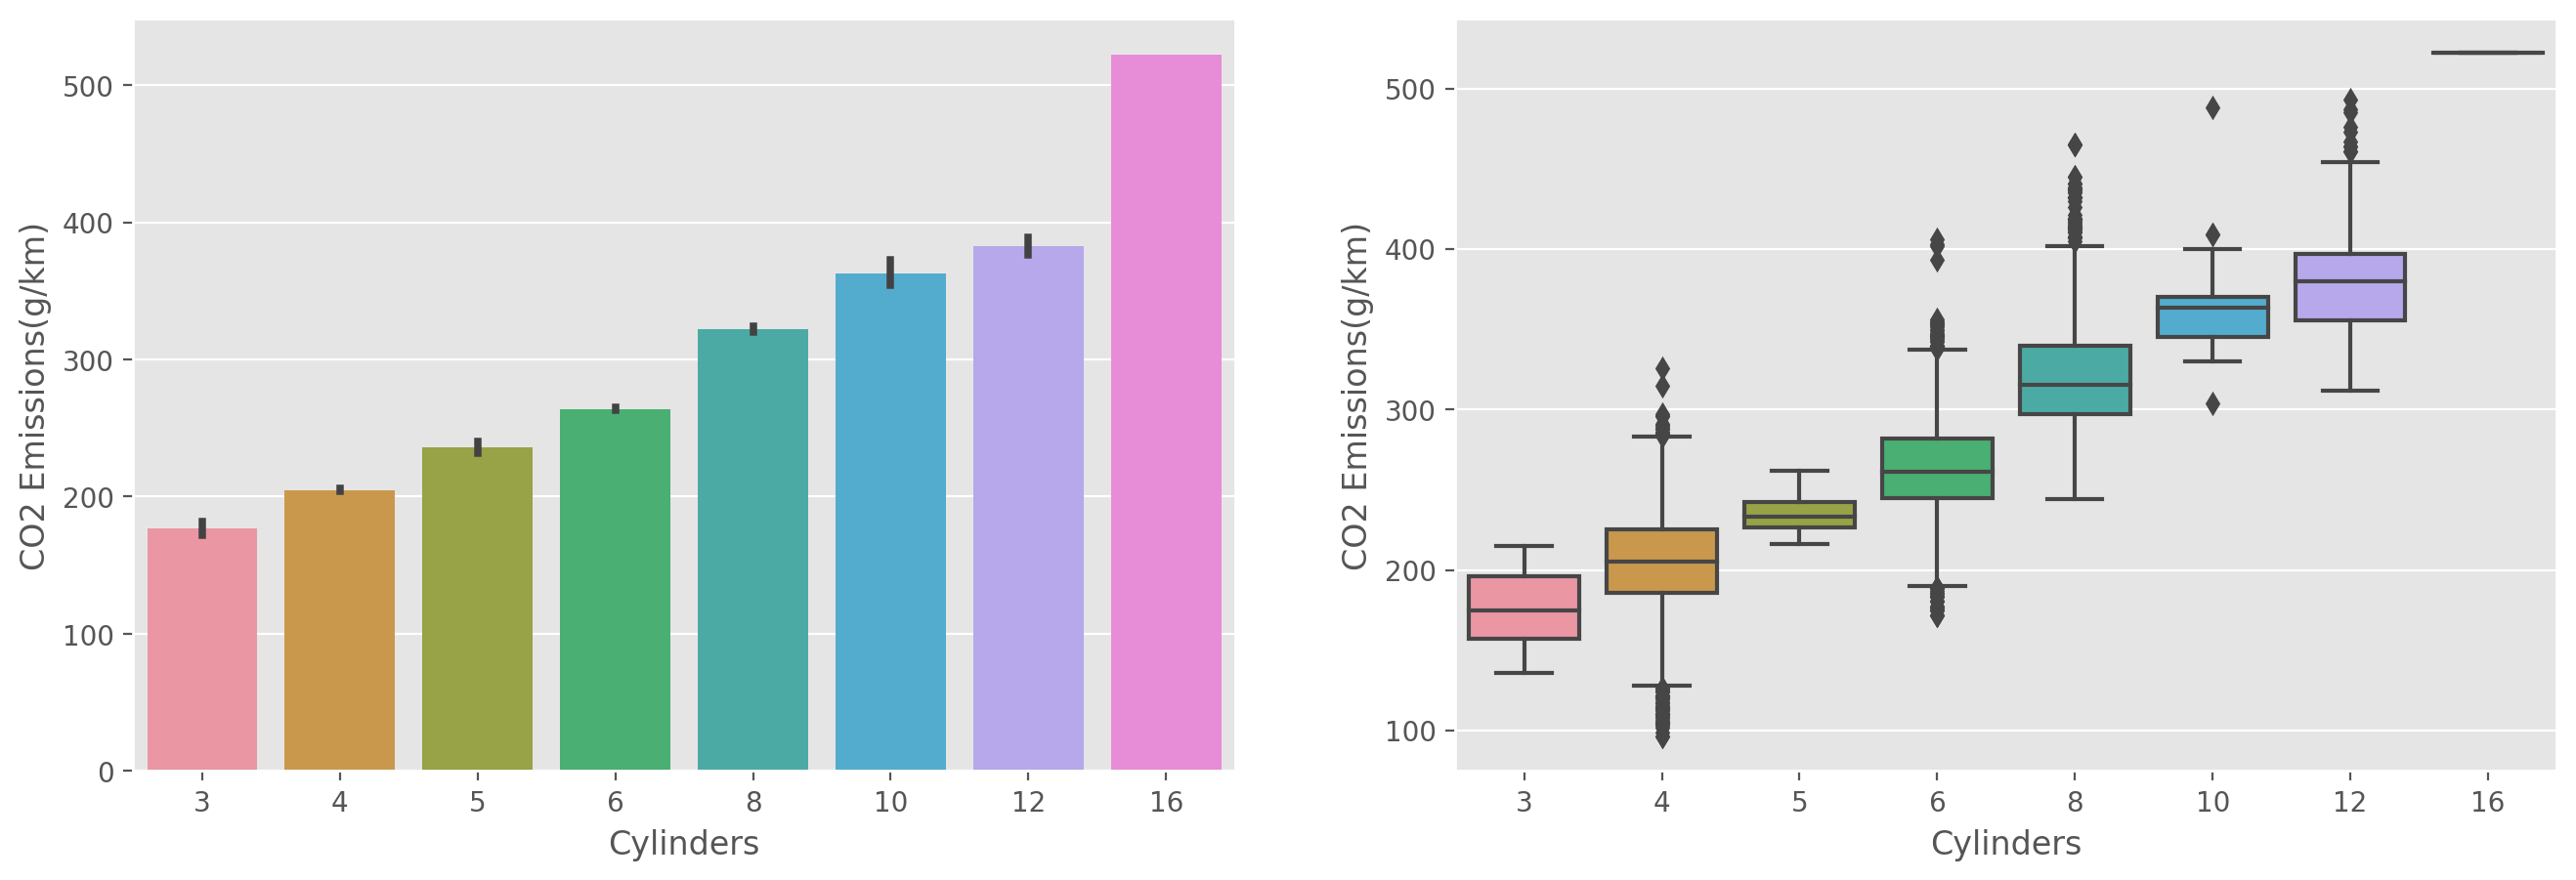

In [16]:
# Number of cylinders and Carbon Emission
# no pf cylinders is a categorical column
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.barplot(x='Cylinders', y='CO2 Emissions(g/km)', data = data)
plt.subplot(1,2,2)
sns.boxplot(x='Cylinders', y='CO2 Emissions(g/km)', data = data)

- from above we understand that, vehicles with more number of cylinders emit more CO2

<Axes: xlabel='Fuel Type', ylabel='CO2 Emissions(g/km)'>

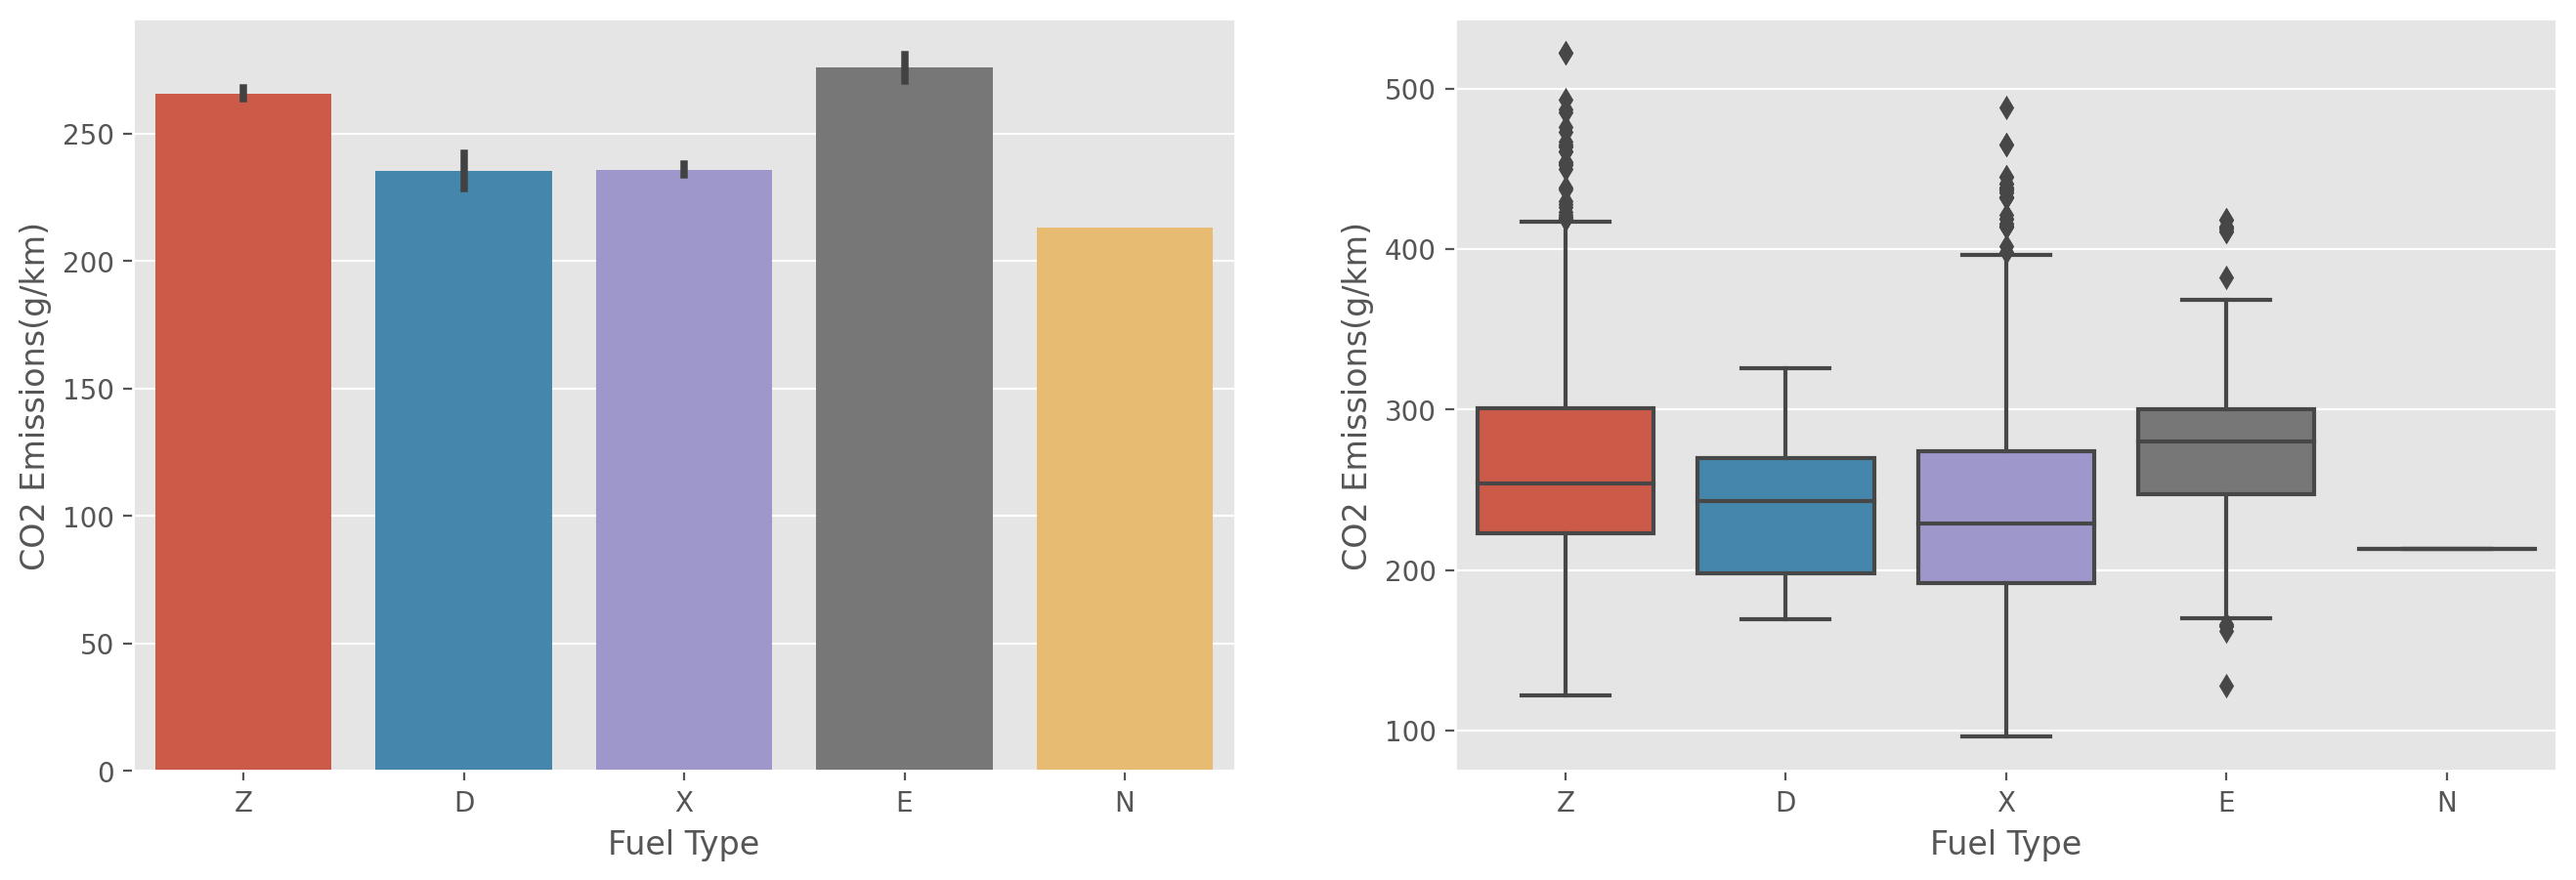

In [17]:
# Fuel Type and Carbon Emission
plt.figure(figsize = (16,5), dpi = 200)
plt.subplot(1,2,1)
sns.barplot(x='Fuel Type', y='CO2 Emissions(g/km)', data = data)
plt.subplot(1,2,2)
sns.boxplot(x='Fuel Type', y='CO2 Emissions(g/km)', data = data)

- CO2 emission depends not much on fule type, but little, E has more CO2 emission than others

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Vehicle Class'>

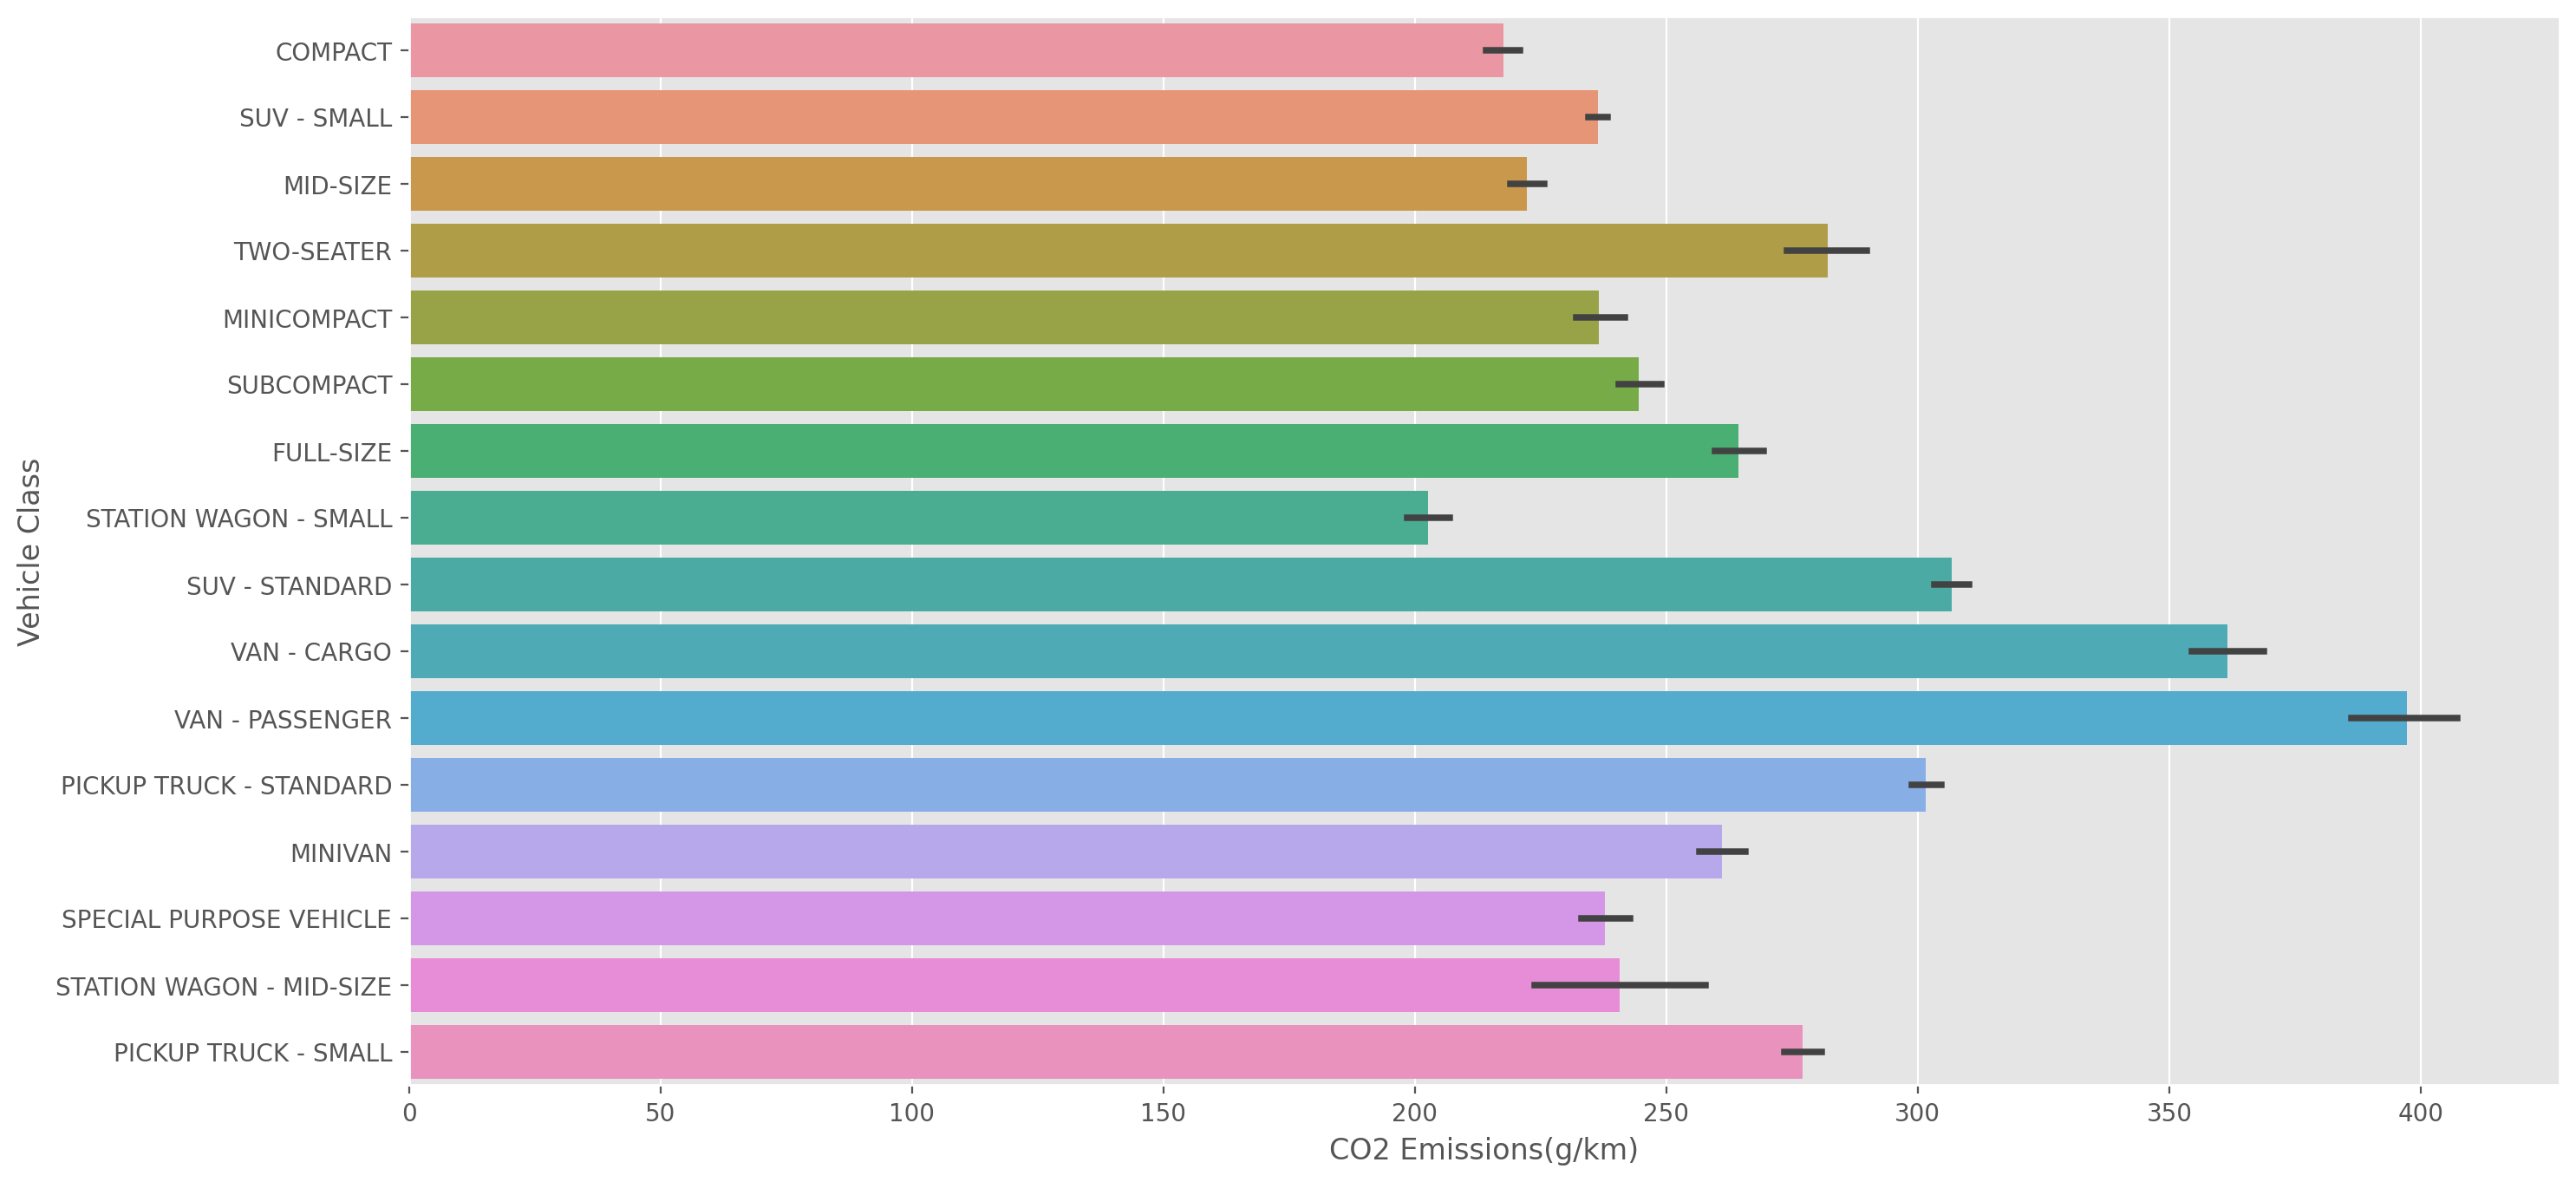

In [18]:
# Vehicle Class and Carbon Emission
# Both are categorical
plt.figure(figsize = (16,8), dpi = 200)
sns.barplot(x='CO2 Emissions(g/km)', y='Vehicle Class', data = data)

- CO2 emissions is getting affected by vechilce class
- bigger vehicles emit more

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Transmission'>

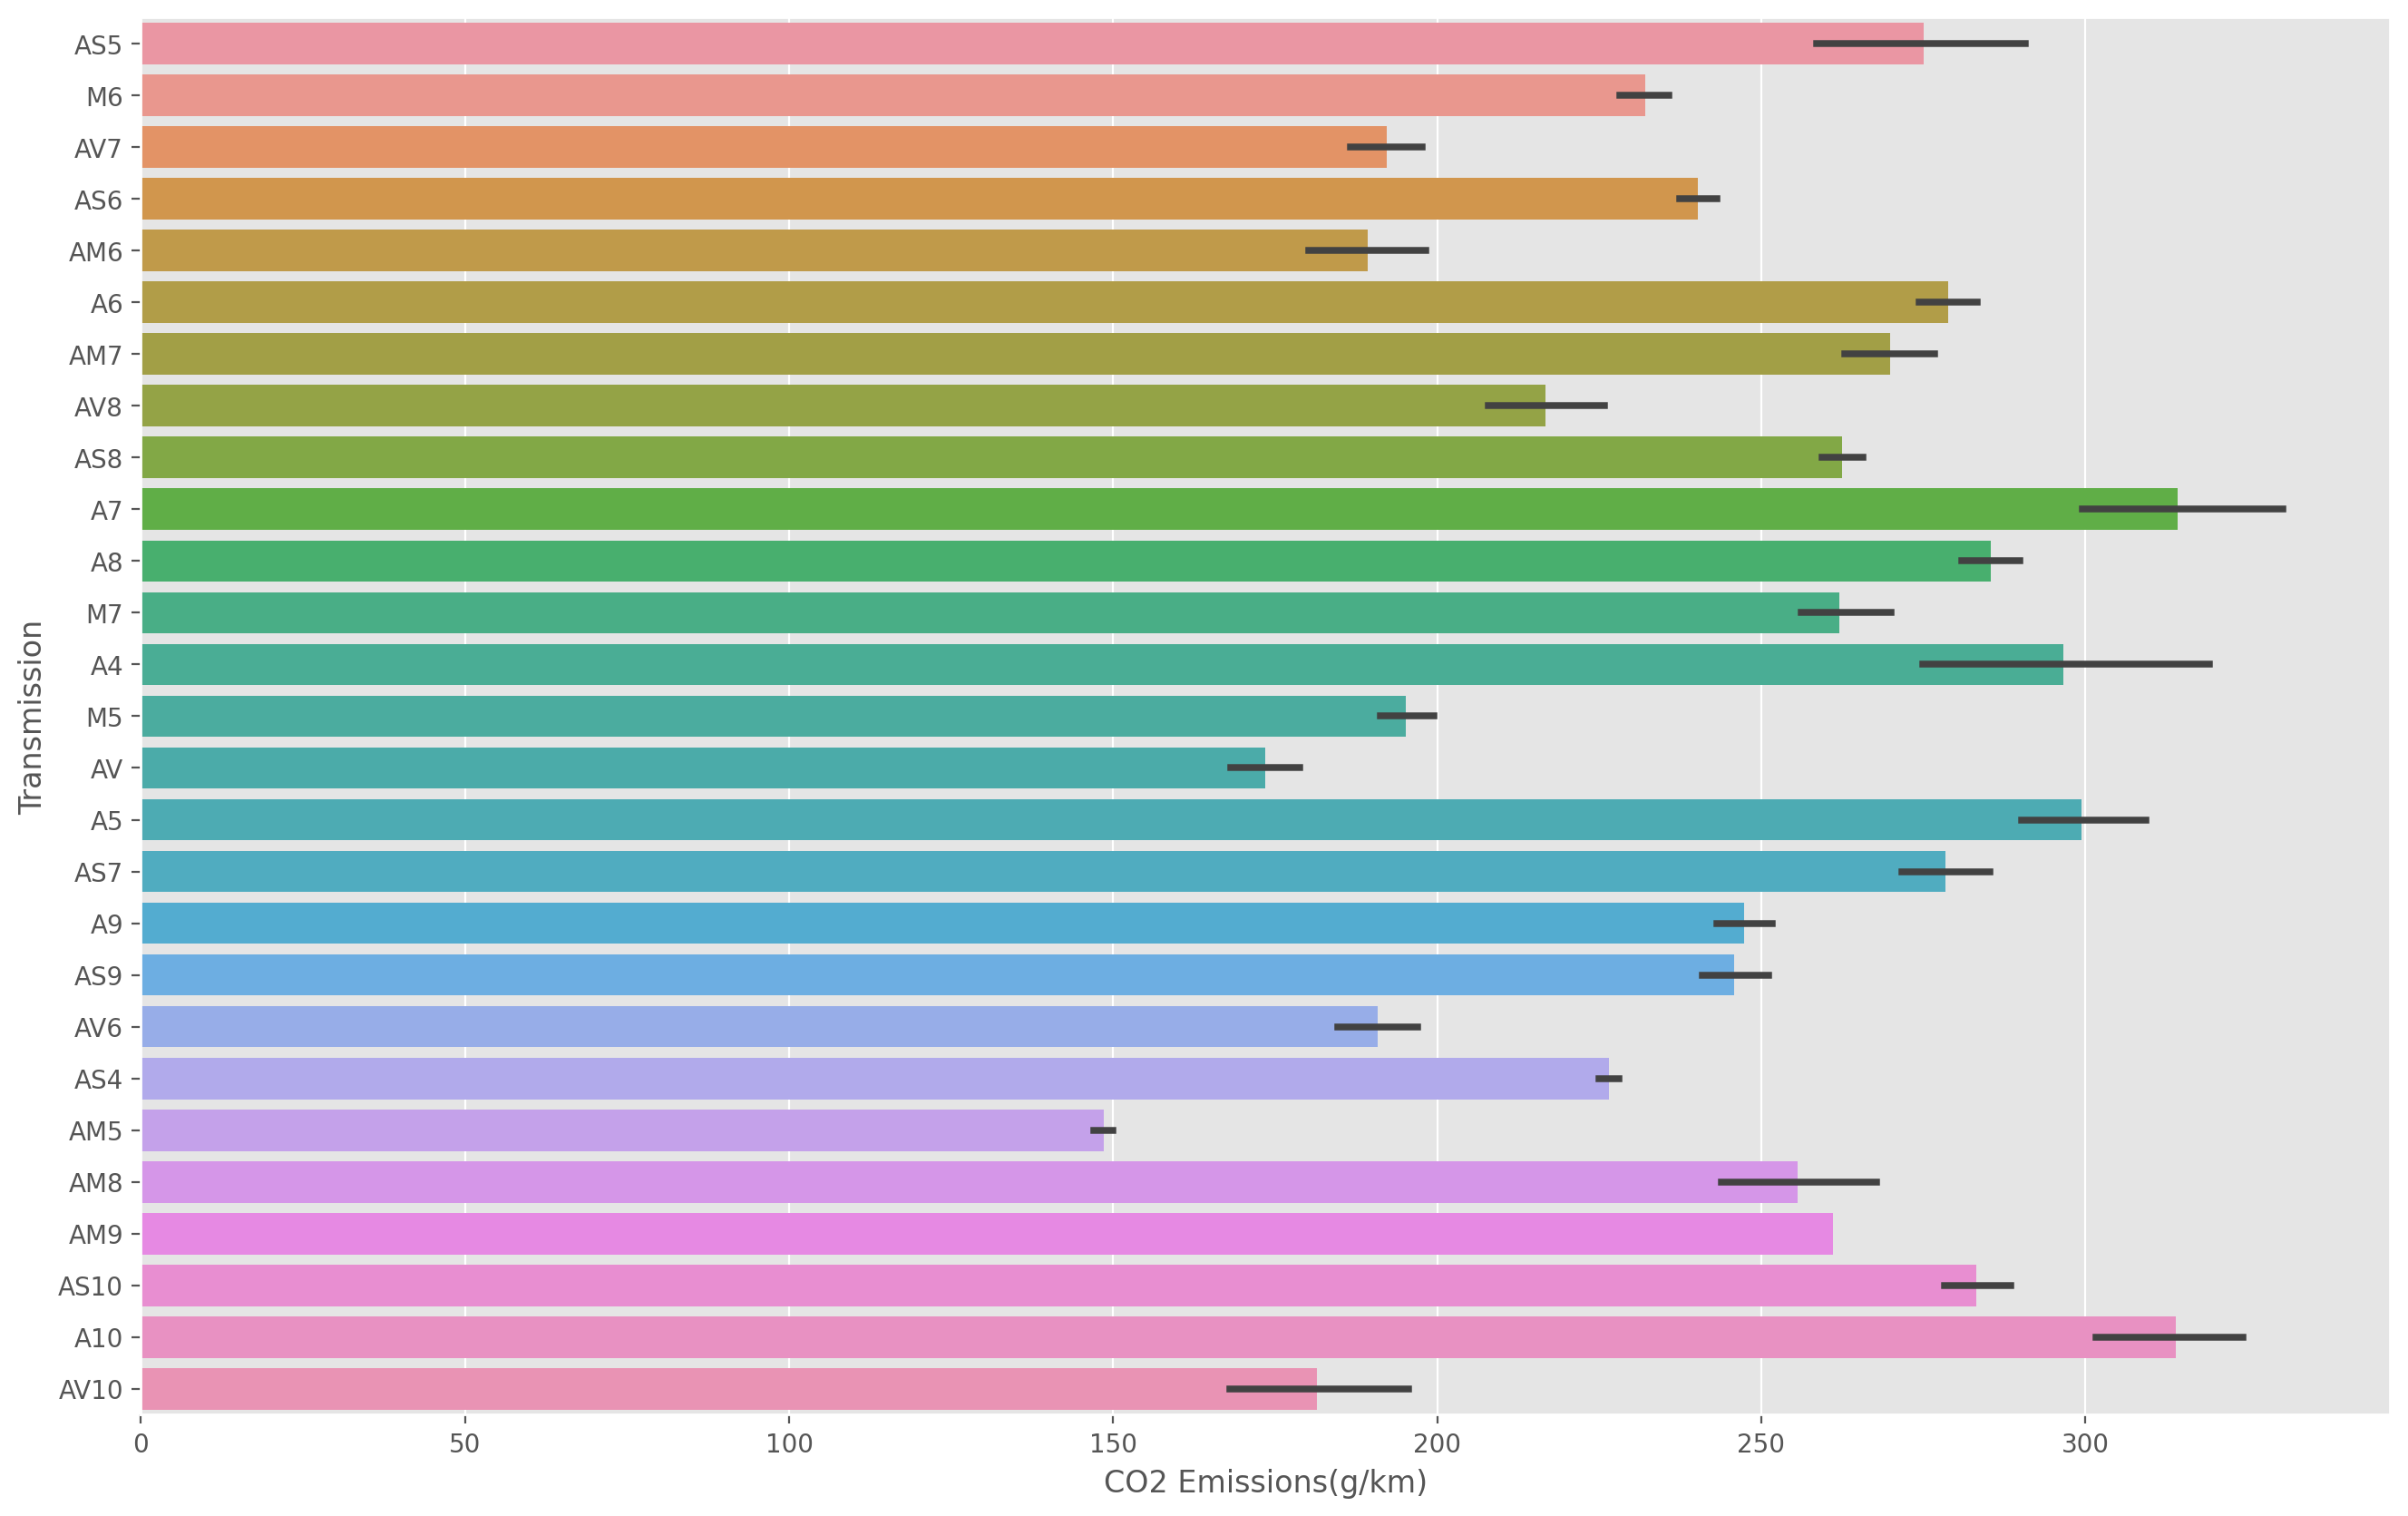

In [19]:
# Transmission and Carbon Emission
plt.figure(figsize = (16,10), dpi = 200)
sns.barplot(x='CO2 Emissions(g/km)', y='Transmission', data = data)

- Type of transmission is also affecting the trasnmission type

- Multi colinearity - when our independent features are having very high corelation among them, we should avoid it
- since our model may not be smooth
- we should avoid vvvhigh corelation between our independent features

<Axes: >

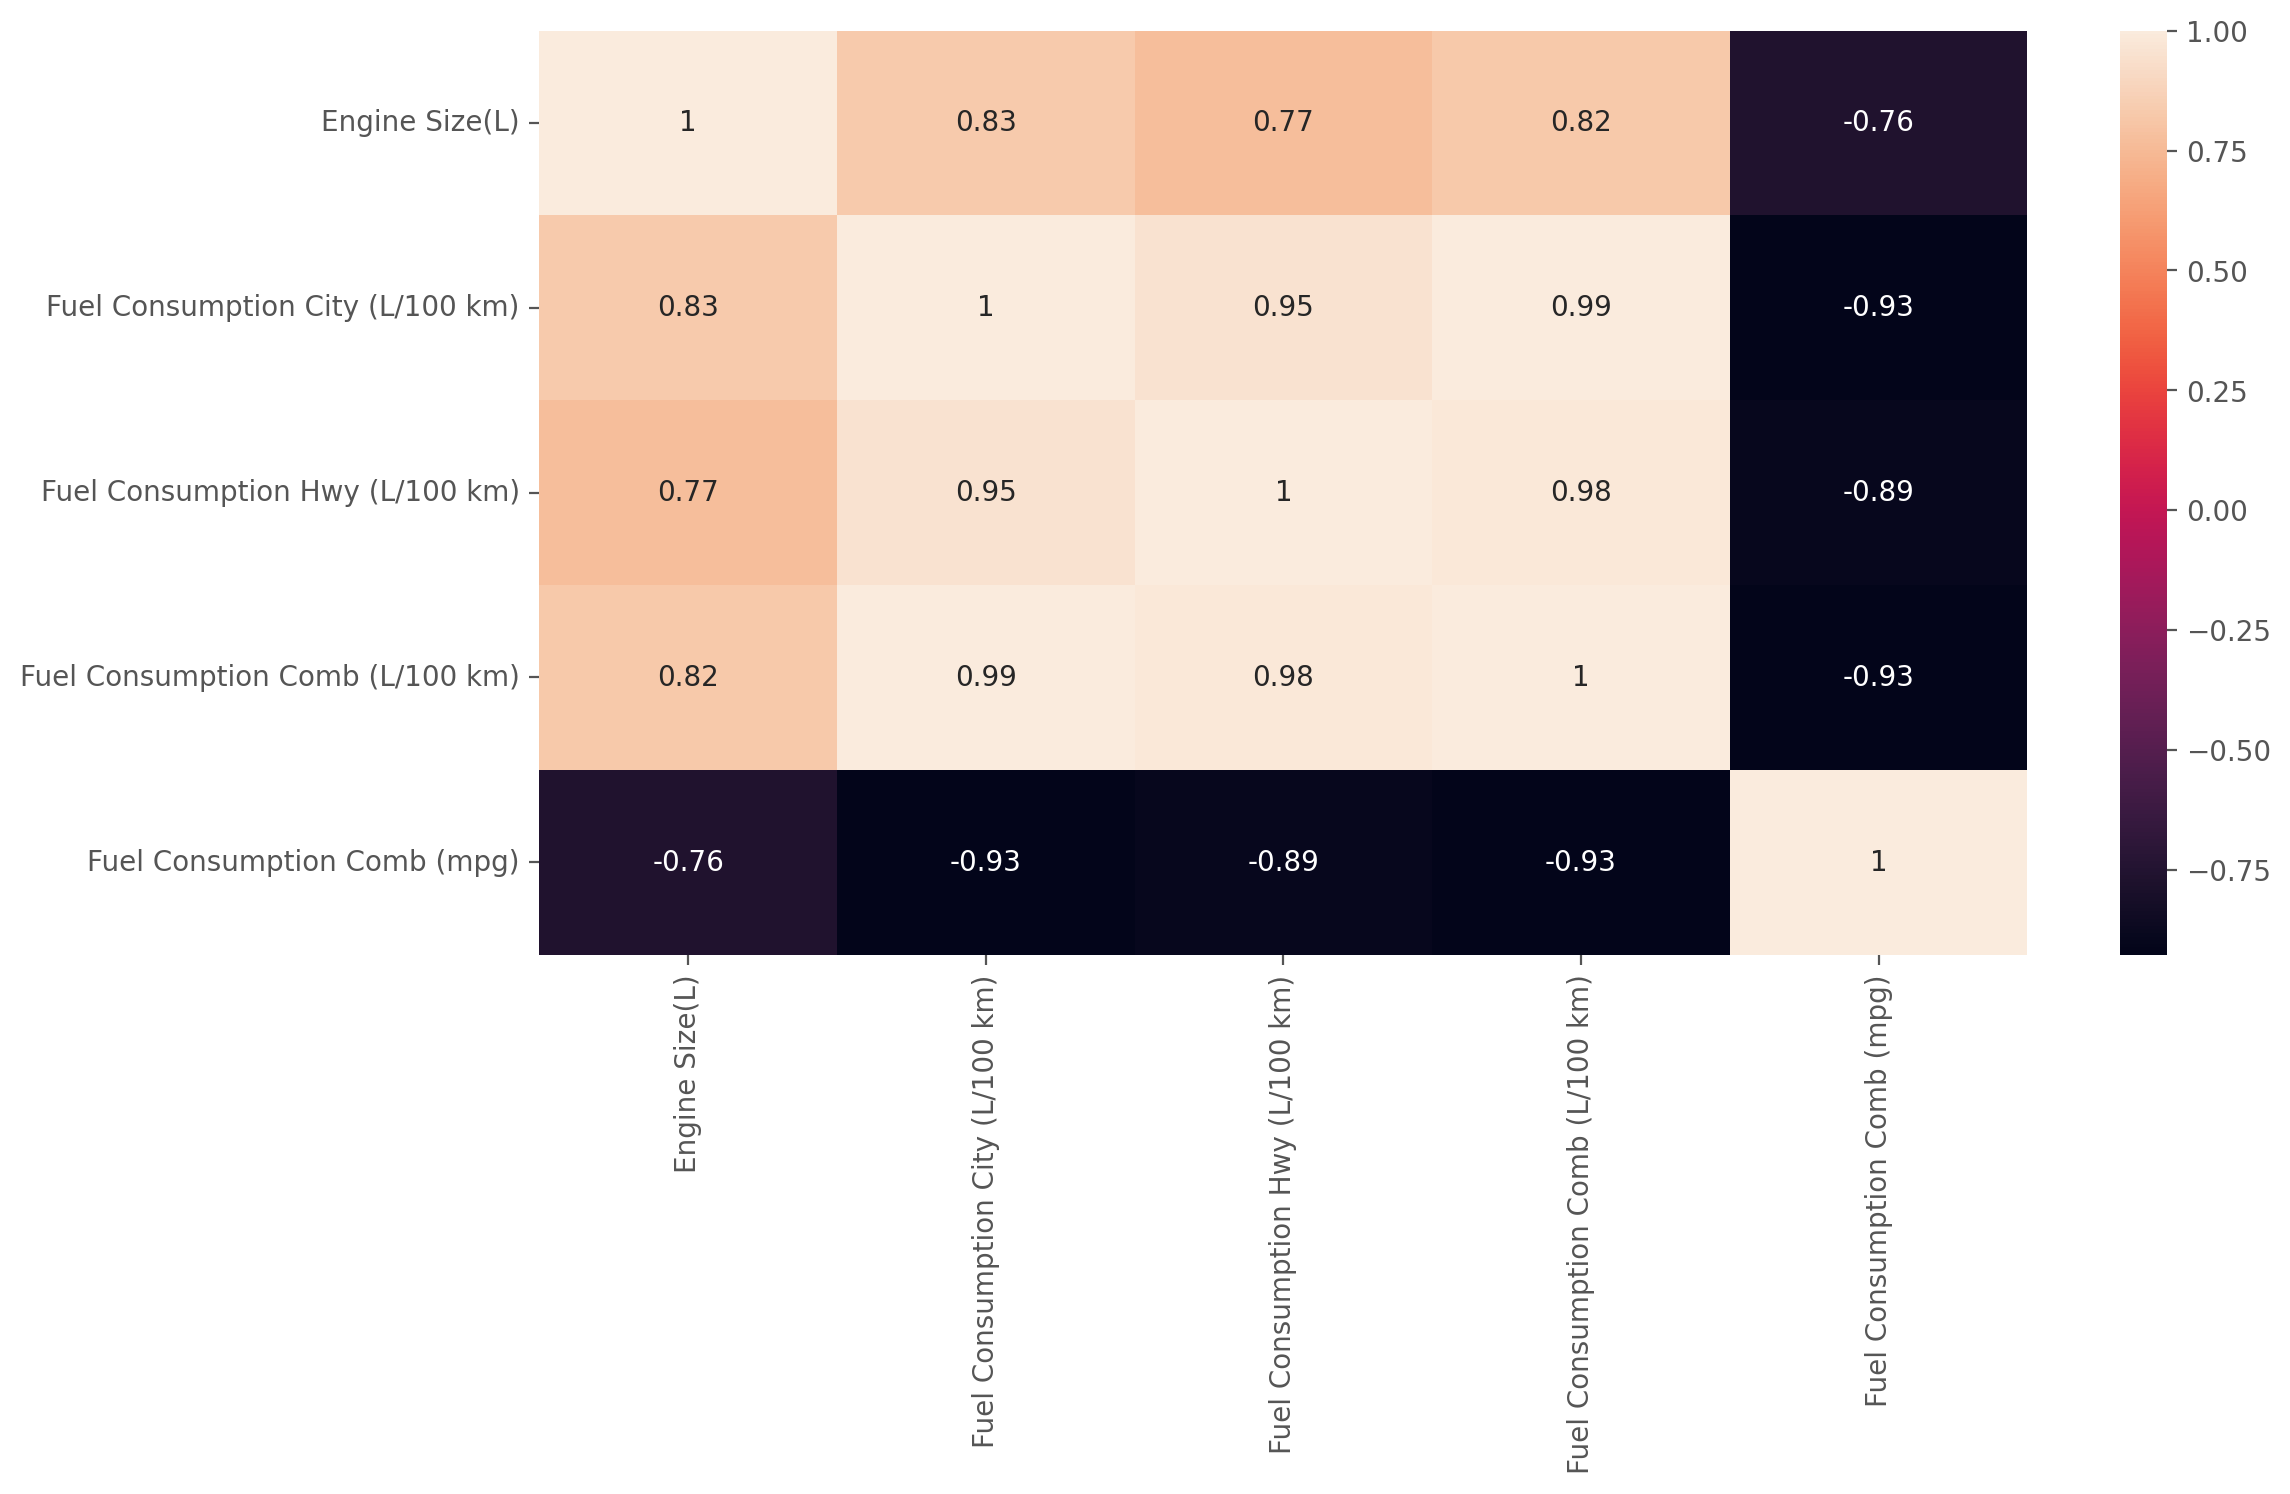

In [20]:
# Checking Correlation
cols = ['Engine Size(L)', 'Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)']
plt.figure(figsize = (12,6), dpi = 200)
sns.heatmap(data[cols].corr(), annot = True)

- 9+ is considered v high corelation
- all the fuel consumption columns have high corelation
- depending on it choose the columns with low corelations

In [21]:
# completed EDA
# start extracting dependent and independent feature sets

#following are the input columns for our machine learning
cols = ['Vehicle Class', 'Fuel Type', 'Transmission', 'Cylinders', 'Engine Size(L)', 'Fuel Consumption Comb (L/100 km)']
X = data[cols]                      # Independent Feature Set is always denoted by X
Y = data[['CO2 Emissions(g/km)']]   # Depedent Feature/Output/Target column, Here data is 2d therefore 2 brackets

In [22]:
X.head(10)
#there are our independent features which act as input to our module

,Vehicle Class,Fuel Type,Transmission,Cylinders,Engine Size(L),Fuel Consumption Comb (L/100 km)
0,COMPACT,Z,AS5,4,2.0,8.5
1,COMPACT,Z,M6,4,2.4,9.6
2,COMPACT,Z,AV7,4,1.5,5.9
3,SUV - SMALL,Z,AS6,6,3.5,11.1
4,SUV - SMALL,Z,AS6,6,3.5,10.6
5,MID-SIZE,Z,AS6,6,3.5,10.0
6,MID-SIZE,Z,AS6,6,3.5,10.1
7,MID-SIZE,Z,AS6,6,3.7,11.1
8,MID-SIZE,Z,M6,6,3.7,11.6
9,COMPACT,Z,AS5,4,2.4,9.2


In [23]:
#dependent outputs
Y.head(10)

,CO2 Emissions(g/km)
0,196
1,221
2,136
3,255
4,244
5,230
6,232
7,255
8,267
9,212


In [24]:
# teh errors often occur in ML are shape mismatching, therefore always keep checking shapes
print('Independent Feature Set Shape : ', X.shape)
print('Dependent Feature Shape       : ', Y.shape)

Independent Feature Set Shape :  (6282, 6)
Dependent Feature Shape       :  (6282, 1)


In [25]:
# Splitting the data into training and testing sets
# our data is split into training and testing set, 80% training set, 20% testing set
# before implementing our model we should test our model performence
from sklearn.model_selection import train_test_split
# above returns in the same format and its always the same
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 2)
# test_size = 0.2 means almost 20% data kept for testing
# random_state is a parameter if all of provide same value, split will be exactly same

In [26]:
# Again checking their shapes
print('Training')
print(x_train.shape)
print(y_train.shape)
print('\nTesting')
print(x_test.shape)
print(y_test.shape)

Training
(5025, 6)
(5025, 1)

Testing
(1257, 6)
(1257, 1)


In [27]:
# Encoding - Categorical date needs to give numerical representation because ML uses mathematics
# Maths or extract patterns cannot be done on categorical data

cols = ['Vehicle Class', 'Fuel Type', 'Transmission']
from sklearn.preprocessing import OrdinalEncoder
# we have OrdinalEncoder, lebelencoder, Onehotencoder
# categorical data replaced as neumerical data
encoder = OrdinalEncoder()

# while doing encoding we need to do two things, fitting and encoding
# fitting is done on training set only
encoder.fit(x_train[cols])

# after fitting on train set we transform the train and test set
x_train[cols] = encoder.transform(x_train[cols])
x_test[cols]  = encoder.transform(x_test[cols])

# OrdinalEncoder is used when we dont have any order
# when our data don't have any order OrdinalEncoder lebelencoder both behave in the same way

#never execute this twice

In [28]:
x_train.head(10)

,Vehicle Class,Fuel Type,Transmission,Cylinders,Engine Size(L),Fuel Consumption Comb (L/100 km)
5583,11.0,3.0,3.0,4,2.5,10.0
749,10.0,4.0,16.0,6,3.5,10.2
7125,2.0,4.0,17.0,6,3.0,12.6
7335,0.0,3.0,19.0,4,1.8,4.5
5942,1.0,3.0,15.0,4,2.4,8.3
209,11.0,1.0,3.0,6,3.6,17.0
2308,0.0,4.0,17.0,6,3.0,10.2
375,6.0,3.0,3.0,6,3.7,12.3
5531,1.0,4.0,17.0,8,4.4,11.5
6302,2.0,3.0,19.0,4,1.6,7.0


In [29]:
# encoding is not mandatory done only if there a strings

In [30]:
# next step is scaling
# used when we have numerical data set and its scales are diffrent
# scaling is only for neumerical columns, we never do scaling on categorical cols that have been encoded

cols = ['Engine Size(L)', 'Fuel Consumption Comb (L/100 km)']

from sklearn.preprocessing import MinMaxScaler

#minmaxscaler and stdscaler
scaler = MinMaxScaler()

# Fit on training set
scaler.fit(x_train[cols])

# Tranform training and testing sets
x_train[cols] = scaler.transform(x_train[cols])
x_test[cols]  = scaler.transform(x_test[cols])

In [31]:
x_train.head(10)

,Vehicle Class,Fuel Type,Transmission,Cylinders,Engine Size(L),Fuel Consumption Comb (L/100 km)
5583,11.0,3.0,3.0,4,0.213333,0.270642
749,10.0,4.0,16.0,6,0.346667,0.279817
7125,2.0,4.0,17.0,6,0.280000,0.389908
7335,0.0,3.0,19.0,4,0.120000,0.018349
5942,1.0,3.0,15.0,4,0.200000,0.192661
209,11.0,1.0,3.0,6,0.360000,0.591743
2308,0.0,4.0,17.0,6,0.280000,0.279817
375,6.0,3.0,3.0,6,0.373333,0.376147
5531,1.0,4.0,17.0,8,0.466667,0.339450
6302,2.0,3.0,19.0,4,0.093333,0.133028


In [32]:
x_test.head(10)

,Vehicle Class,Fuel Type,Transmission,Cylinders,Engine Size(L),Fuel Consumption Comb (L/100 km)
3000,10.0,4.0,16.0,8,0.506667,0.348624
6477,9.0,3.0,25.0,4,0.120000,0.252294
4078,10.0,4.0,16.0,6,0.280000,0.279817
3407,0.0,4.0,17.0,6,0.280000,0.298165
2417,0.0,3.0,25.0,4,0.066667,0.137615
5507,13.0,3.0,9.0,4,0.146667,0.233945
15,13.0,4.0,9.0,8,0.506667,0.486239
5170,7.0,4.0,4.0,4,0.146667,0.302752
2278,0.0,4.0,17.0,4,0.146667,0.220183
5855,6.0,3.0,3.0,8,0.586667,0.472477


### Prepared data for ML
- now data is ready for machine learning
- same for evry proj, some time we may/maynot have scaling, encoding etc etc

In [33]:
encoder.categories_

[array(['COMPACT', 'FULL-SIZE', 'MID-SIZE', 'MINICOMPACT', 'MINIVAN',
        'PICKUP TRUCK - SMALL', 'PICKUP TRUCK - STANDARD',
        'SPECIAL PURPOSE VEHICLE', 'STATION WAGON - MID-SIZE',
        'STATION WAGON - SMALL', 'SUBCOMPACT', 'SUV - SMALL',
        'SUV - STANDARD', 'TWO-SEATER', 'VAN - CARGO', 'VAN - PASSENGER'],
       dtype=object),
 array(['D', 'E', 'N', 'X', 'Z'], dtype=object),
 array(['A10', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'AM5', 'AM6', 'AM7',
        'AM8', 'AM9', 'AS10', 'AS4', 'AS5', 'AS6', 'AS7', 'AS8', 'AS9',
        'AV', 'AV10', 'AV6', 'AV7', 'AV8', 'M5', 'M6', 'M7'], dtype=object)]

- Model training

In [34]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors = 3)
regressor.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [35]:
pred_train = regressor.predict(x_train)
pred_test  = regressor.predict(x_test)

from sklearn.metrics import r2_score
print('Training Set Score : ', r2_score(y_train, pred_train))
print('Testing Set Score  : ', r2_score(y_test, pred_test))

Training Set Score :  0.9915430253503116
Testing Set Score  :  0.9750160117323092


In [36]:
x_test[:5]

,Vehicle Class,Fuel Type,Transmission,Cylinders,Engine Size(L),Fuel Consumption Comb (L/100 km)
3000,10.0,4.0,16.0,8,0.506667,0.348624
6477,9.0,3.0,25.0,4,0.120000,0.252294
4078,10.0,4.0,16.0,6,0.280000,0.279817
3407,0.0,4.0,17.0,6,0.280000,0.298165
2417,0.0,3.0,25.0,4,0.066667,0.137615


In [37]:
regressor.predict(x_test[:1])

array([[266.66666667]])

In [38]:
regressor.predict(x_test[:5])

array([[266.66666667],
       [217.33333333],
       [245.        ],
       [243.33333333],
       [168.33333333]])